In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import plot_model


In [3]:
iris = datasets.load_iris()

In [4]:
X = iris.data
y = iris.target.reshape(-1, 1)

In [5]:
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = Sequential()
model.add(Dense(10, input_shape=(4,), activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [9]:
model.fit(X_train, y_train, epochs=50, batch_size=1, verbose=0)

In [10]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Loss: {loss}, Accuracy: {accuracy}')

Loss: 0.0677076056599617, Accuracy: 1.0


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 193 (772.00 Byte)
Trainable params: 193 (772.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


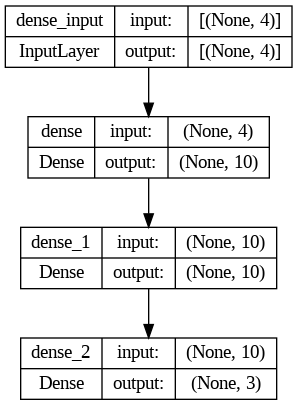

In [12]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)